<a href="https://colab.research.google.com/github/alexandrgsv/stock_prediction_models/blob/main/XGBoostRegressor_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mean Squared Error: 1.440140098348943e-05


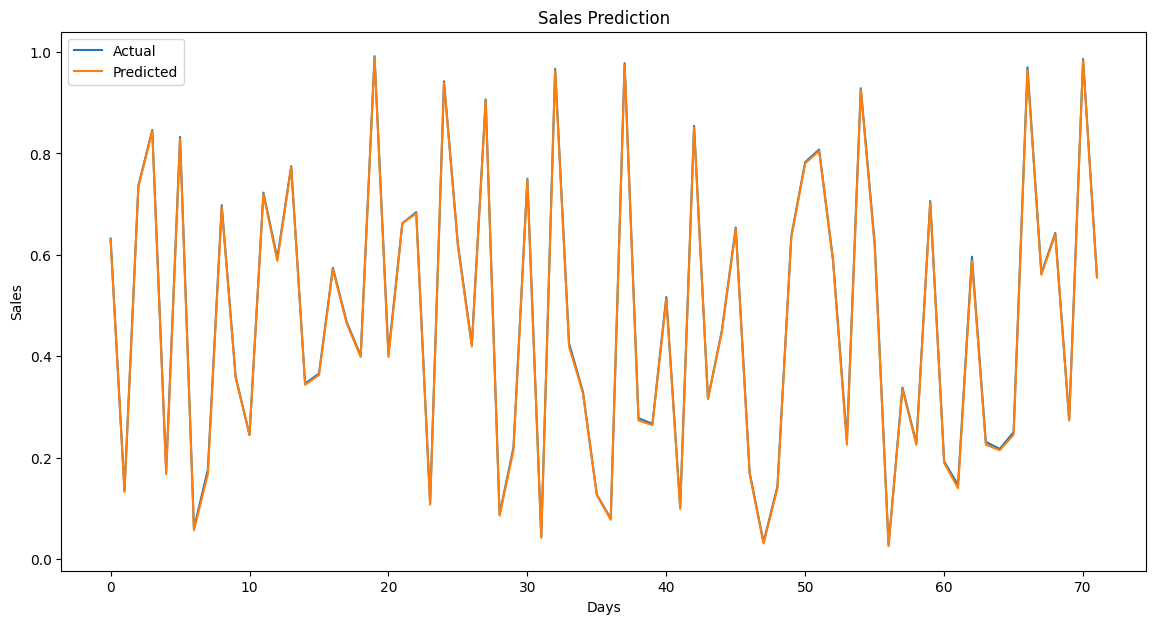

In [75]:
import pandas as pd
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler


# Генерируем данные продаж за год (масштабированные от 0 до 1)
sales = np.linspace(0, 1, 365)


# Создаем даты для каждого дня в году
dates = pd.date_range(start='2022-01-01', end='2022-12-31')

# Создаем DataFrame
df = pd.DataFrame(data={'date': dates, 'sales': sales})

# Устанавливаем 'date' в качестве индекса
df.set_index('date', inplace=True)

df['lag_1'] = df['sales'].shift(1)
df['lag_2'] = df['sales'].shift(2)
df['lag_3'] = df['sales'].shift(3)
df['lag_4'] = df['sales'].shift(4)
df['lag_5'] = df['sales'].shift(5)
df['lag_6'] = df['sales'].shift(6)
df['lag_7'] = df['sales'].shift(7)

df = df.dropna()  # удалить строки с NaN значениями

X = df[['lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5', 'lag_6', 'lag_7']]
y = df['sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = XGBRegressor(n_estimators=10000, learning_rate=0.05, objective='reg:squarederror')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# построение графика истинных значений
plt.figure(figsize=(14, 7))
plt.plot(y_test.values, label='Actual')
# построение графика прогнозируемых значений
plt.plot(y_pred, label='Predicted')
plt.title('Sales Prediction')
plt.xlabel('Days')
plt.ylabel('Sales')
plt.legend()
plt.show()